In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from collections import Counter
import seaborn as sns

In [2]:
df=pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
print([i for i in df.columns])

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '

In [6]:
df.shape

(51392, 154)

In [7]:
df.isna().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [8]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [9]:
df.isna().sum()

Respondent              0
Professional            0
ProgramHobby            0
Country                 0
University              0
                       ..
QuestionsInteresting    0
QuestionsConfusing      0
InterestedAnswers       0
Salary                  0
ExpectedSalary          0
Length: 154, dtype: int64

In [10]:
df.groupby(['WorkStart'])['Salary'].mean().sort_values(ascending=True) 

WorkStart
1:00 AM     35648.029362
3:00 AM     43663.458509
Midnight    47428.867055
5:00 PM     48140.761773
7:00 PM     50101.602694
2:00 PM     50952.675934
Noon        51087.662468
6:00 PM     51156.943188
3:00 PM     51865.277563
11:00 AM    51902.400640
1:00 PM     52122.551716
10:00 PM    52203.181473
2:00 AM     52900.065828
4:00 AM     53110.151891
9:00 PM     53125.286782
11:00 PM    53280.267573
4:00 PM     53304.008856
8:00 AM     53496.128697
8:00 PM     53974.284474
9:00 AM     54427.492327
6:00 AM     55132.836134
10:00 AM    55845.405257
7:00 AM     56731.862391
5:00 AM     60035.576059
Name: Salary, dtype: float64

<AxesSubplot:title={'center':'WorkStart'}, xlabel='count', ylabel='WorkStart'>

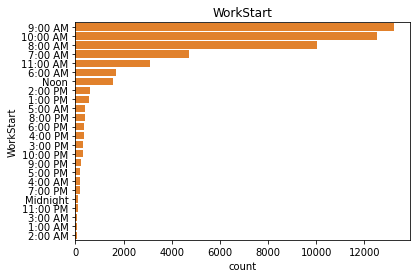

In [11]:
plt.title("WorkStart")
sns.countplot(data = df, y = 'WorkStart', order = df['WorkStart'].value_counts().index,
             color = sns.color_palette()[1])

In [12]:
df['IDE']

0                                              Atom; Xcode
1        Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...
2                              Sublime Text; Vim; IntelliJ
3        Notepad++; Sublime Text; TextMate; Vim; IPytho...
4        Notepad++; Sublime Text; TextMate; Vim; IPytho...
                               ...                        
51387                          Sublime Text; Visual Studio
51388                    Notepad++; Sublime Text; NetBeans
51389                    Notepad++; Sublime Text; NetBeans
51390                                    Emacs; Vim; Xcode
51391                    Notepad++; Eclipse; Visual Studio
Name: IDE, Length: 51392, dtype: object

In [13]:
df['IDE']

0                                              Atom; Xcode
1        Atom; Notepad++; Vim; PyCharm; RubyMine; Visua...
2                              Sublime Text; Vim; IntelliJ
3        Notepad++; Sublime Text; TextMate; Vim; IPytho...
4        Notepad++; Sublime Text; TextMate; Vim; IPytho...
                               ...                        
51387                          Sublime Text; Visual Studio
51388                    Notepad++; Sublime Text; NetBeans
51389                    Notepad++; Sublime Text; NetBeans
51390                                    Emacs; Vim; Xcode
51391                    Notepad++; Eclipse; Visual Studio
Name: IDE, Length: 51392, dtype: object

In [14]:
IDE = df[~df['IDE'].isnull()]
IDE = IDE['IDE'].apply(lambda x: x.split("; "))

In [15]:
IDE

0                                            [Atom, Xcode]
1        [Atom, Notepad++, Vim, PyCharm, RubyMine, Visu...
2                            [Sublime Text, Vim, IntelliJ]
3        [Notepad++, Sublime Text, TextMate, Vim, IPyth...
4        [Notepad++, Sublime Text, TextMate, Vim, IPyth...
                               ...                        
51387                        [Sublime Text, Visual Studio]
51388                  [Notepad++, Sublime Text, NetBeans]
51389                  [Notepad++, Sublime Text, NetBeans]
51390                                  [Emacs, Vim, Xcode]
51391                  [Notepad++, Eclipse, Visual Studio]
Name: IDE, Length: 51392, dtype: object

In [16]:
IDE = reduce(lambda x,y: x+y, IDE, [])
IDECount = Counter(IDE).keys()
IDE = Counter(IDE).values()

In [17]:
zip_lst = sorted(zip(list(IDECount), list(IDE)), key=lambda x: x[1], reverse=True) 

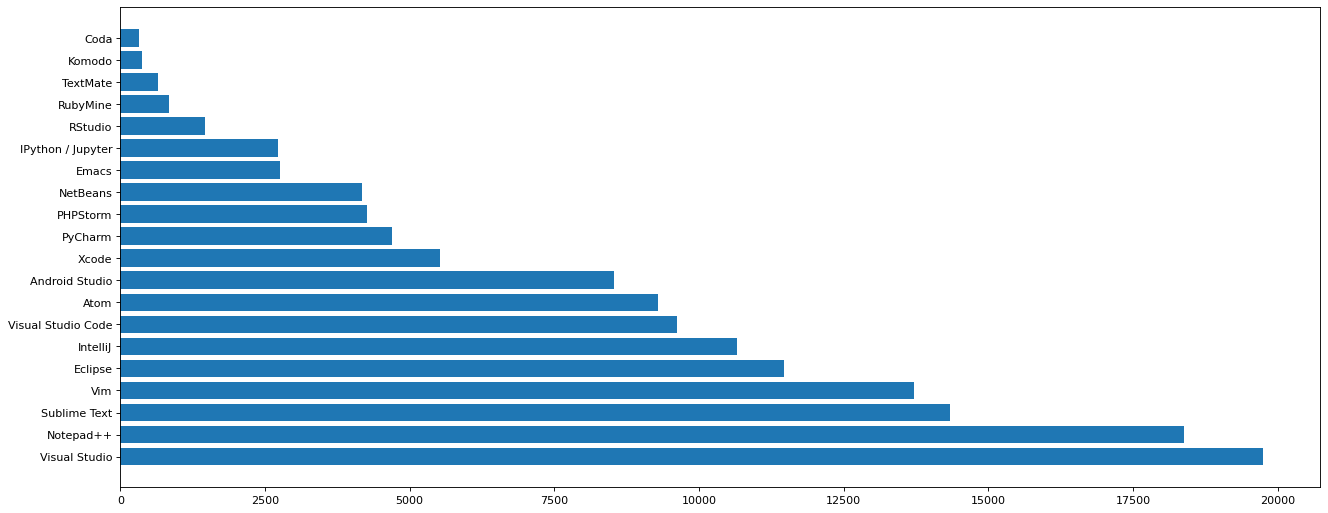

In [18]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
langs, values = zip(*zip_lst)
ax.barh(langs[:20],values[:20])
plt.show()

**Result :**

```
Visual Studio and Notepad++ are two most popular IDE used by developer
```

**Highest education of parents**

In [19]:
parentsEd = df['HighestEducationParents'].value_counts()
parentsEd

A bachelor's degree                                    14975
A master's degree                                      11108
High school                                             8648
Some college/university study, no bachelor's degree     7022
A doctoral degree                                       3021
A professional degree                                   2243
Primary/elementary school                               2090
I don't know/not sure                                   1066
I prefer not to answer                                   883
No education                                             336
Name: HighestEducationParents, dtype: int64

In [20]:
parents_salary_plot = df.groupby(['HighestEducationParents'])['Salary'].mean().sort_values(ascending=True) 


In [21]:
parents_salary_plot

HighestEducationParents
No education                                           45268.636104
Primary/elementary school                              45640.145536
I prefer not to answer                                 50086.306823
High school                                            51993.006757
I don't know/not sure                                  53517.560921
A bachelor's degree                                    54412.307372
A master's degree                                      55299.815070
Some college/university study, no bachelor's degree    56272.190542
A professional degree                                  57754.050085
A doctoral degree                                      59311.885934
Name: Salary, dtype: float64

In [22]:
ffig = plt.figure(figsize=(15, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])
keys = list(parents_salary_plot.keys())
values = list(parents_salary_plot.values)
ax.barh(keys,values)
plt.show()

<Figure size 1200x480 with 0 Axes>

In [23]:
parents_salary_plot.keys()

Index(['No education', 'Primary/elementary school', 'I prefer not to answer',
       'High school', 'I don't know/not sure', 'A bachelor's degree',
       'A master's degree',
       'Some college/university study, no bachelor's degree',
       'A professional degree', 'A doctoral degree'],
      dtype='object', name='HighestEducationParents')

In [24]:
parents_salary_plot.values

array([45268.63610366, 45640.14553597, 50086.30682337, 51993.00675658,
       53517.56092078, 54412.30737234, 55299.81506967, 56272.19054189,
       57754.05008529, 59311.88593422])

Some college/university study, no bachelor's degree


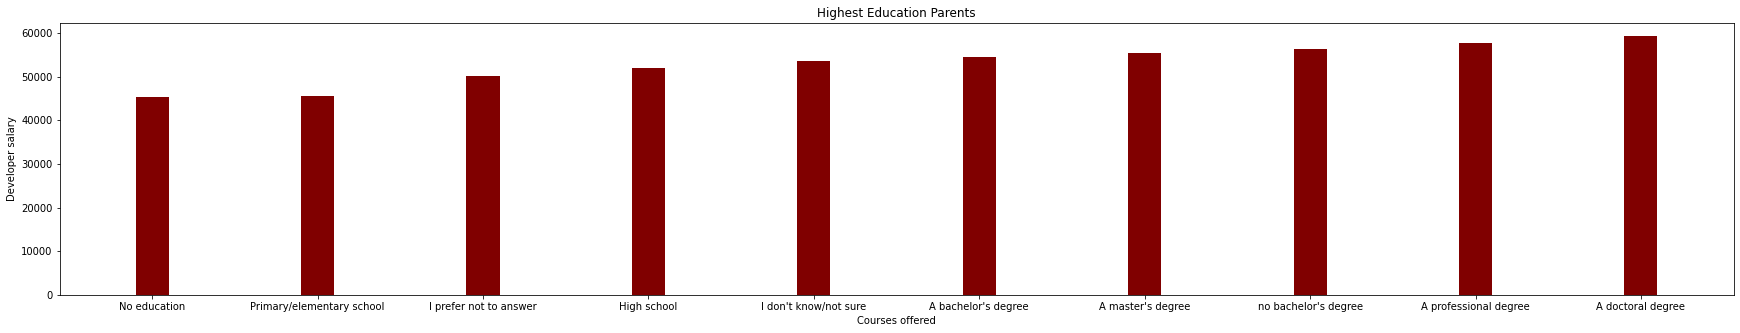

In [25]:
fig = plt.figure(figsize = (30, 5))
print(keys[7])
keys[7] =  "no bachelor's degree"
# creating the bar plot
plt.bar(keys, values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Courses offered")
plt.ylabel("Developer salary")
plt.title("Highest Education Parents")
plt.show()

**Result :**

```
Nearly the higher parents's highest education, the higher salary of developers.
```

**Currency**

In [26]:
Currency = df.groupby('Currency')['Salary'].mean()
Currency

Currency
Australian dollars (A$)        64820.252477
Bitcoin (btc)                  56616.236025
Brazilian reais (R$)           31924.784415
British pounds sterling (£)    50852.315689
Canadian dollars (C$)          58683.699394
Chinese yuan renminbi (¥)      43760.401970
Euros (€)                      44098.356110
Indian rupees (?)              33344.512552
Japanese yen (¥)               46090.459392
Mexican pesos (MXN$)           38663.177640
Polish zloty (zl)              31333.892134
Russian rubles (?)             31828.304802
Singapore dollars (S$)         50907.536298
South African rands (R)        37858.422658
Swedish kroner (SEK)           49086.695534
Swiss francs                   64459.484187
U.S. dollars ($)               75021.391557
Name: Salary, dtype: float64

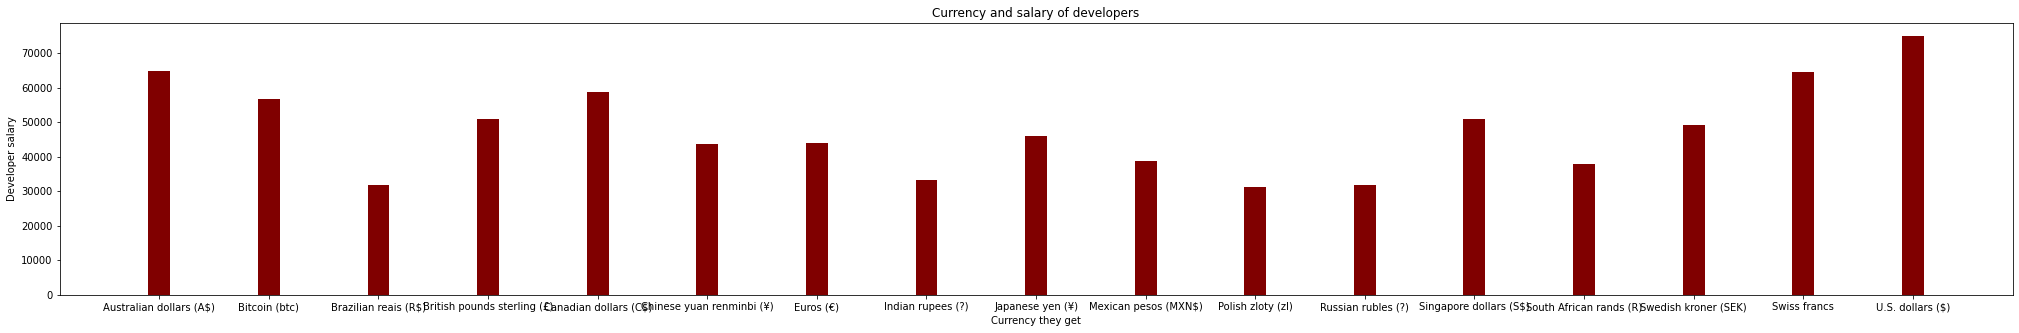

In [27]:
fig = plt.figure(figsize = (35, 5))
# creating the bar plot
plt.bar(Currency.keys(), Currency.values, color ='maroon',
        width = 0.2)
 
plt.xlabel("Currency they get")
plt.ylabel("Developer salary")
plt.title("Currency and salary of developers")
plt.show()


**Result :**

```
The graph show that the salary is dependent on currency they get.
```